In [1]:
import os 
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image 
from keras.models import Sequential, Model
from keras.layers import Input , Activation , Flatten, Dense , Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image,display

Using TensorFlow backend.
/home/kazuki/.pyenv/versions/anaconda3-5.1.0/envs/CoreMl/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
batch_size = 32
epochs = 200

classes = ["dolphin","jellyfish","kumanomi","otter","penguin","turtle", "azarashi","ei","manbou","nanyouhagi","same"]
nb_classes = len(classes)

#画像のサイズ
img_rows = 100
img_cols = 100
channels = 3

train_data_dir = "./data/train"
validation_data_dir = "./data/validation"

result_dir = "./results"

In [3]:
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

In [4]:
input_tensor = Input(shape=(img_rows , img_cols , channels))
base_model = VGG16(weights ="imagenet" , input_tensor = input_tensor, include_top = False)

In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [6]:
x = base_model.output 
x = Flatten(input_shape = base_model.output_shape[1:])(x)
x = Dense(256 , activation = "relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation = "softmax")(x)

In [7]:
model = Model(inputs =  base_model.input , outputs = predictions)
model .summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [8]:
for layer in model.layers[:15]:
    layer.trainable = False

In [9]:
model.compile(loss = "categorical_crossentropy",
              optimizer = optimizers.SGD(lr = 1e-4 ,momentum = 0.9),
              metrics =["accuracy"])

In [10]:
 #教師データの水増しが出来る
train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255 ,
    shear_range = 0.2 , #シアー変換
    zoom_range = 0.2 , # ランダムにズーム
    rotation_range = 5, # ランダムに回転する角度
    horizontal_flip = True # 水平方向に反転
)

In [11]:
test_datagen = ImageDataGenerator(
    rescale = 1.0 / 255 
)

In [12]:
#7クラスの画像を自動検知して均等になるようにしてくれる
train_generator = train_datagen.flow_from_directory(
    train_data_dir ,
    target_size = (img_rows ,img_cols),
    color_mode = "rgb",
    classes = classes ,
    class_mode = "categorical",
    batch_size = batch_size ,
    shuffle = True 
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir ,
    target_size = (img_rows ,img_cols),
    color_mode = "rgb",
    classes = classes ,
    class_mode = "categorical",
    batch_size = batch_size ,
    shuffle = True 
)

Found 1016 images belonging to 11 classes.
Found 1016 images belonging to 11 classes.


In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = epochs ,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/200
31/31 [==============================] - 340s - loss: 2.5331 - acc: 0.1230 - val_loss: 2.2099 - val_acc: 0.2056
Epoch 2/200
31/31 [==============================] - 319s - loss: 2.2953 - acc: 0.1748 - val_loss: 2.0747 - val_acc: 0.2744
Epoch 3/200
31/31 [==============================] - 320s - loss: 2.1615 - acc: 0.2493 - val_loss: 1.9603 - val_acc: 0.3648
Epoch 4/200
31/31 [==============================] - 318s - loss: 2.0253 - acc: 0.2944 - val_loss: 1.8255 - val_acc: 0.4858
Epoch 5/200
31/31 [==============================] - 319s - loss: 1.8800 - acc: 0.3757 - val_loss: 1.6972 - val_acc: 0.5325
Epoch 6/200
31/31 [==============================] - 318s - loss: 1.7522 - acc: 0.4089 - val_loss: 1.5488 - val_acc: 0.5671
Epoch 7/200
31/31 [==============================] - 323s - loss: 1.7291 - acc: 0.4170 - val_loss: 1.4132 - val_acc: 0.6321
Epoch 8/200
31/31 [==============================] - 318s - loss: 1.5845 - acc: 0.4678 - val_loss: 1.3196 - val_acc: 0.6524
Epoch 9/

31/31 [==============================] - 301s - loss: 0.2684 - acc: 0.9136 - val_loss: 0.0993 - val_acc: 0.9827
Epoch 67/200
31/31 [==============================] - 304s - loss: 0.2588 - acc: 0.9116 - val_loss: 0.1072 - val_acc: 0.9787
Epoch 68/200
31/31 [==============================] - 303s - loss: 0.2481 - acc: 0.9241 - val_loss: 0.1061 - val_acc: 0.9736
Epoch 69/200
31/31 [==============================] - 300s - loss: 0.2326 - acc: 0.9254 - val_loss: 0.0843 - val_acc: 0.9888
Epoch 70/200
31/31 [==============================] - 300s - loss: 0.2184 - acc: 0.9308 - val_loss: 0.0819 - val_acc: 0.9878
Epoch 71/200
31/31 [==============================] - 305s - loss: 0.2412 - acc: 0.9220 - val_loss: 0.0831 - val_acc: 0.9878
Epoch 72/200
31/31 [==============================] - 300s - loss: 0.2346 - acc: 0.9261 - val_loss: 0.0842 - val_acc: 0.9888
Epoch 73/200
31/31 [==============================] - 300s - loss: 0.2347 - acc: 0.9281 - val_loss: 0.0836 - val_acc: 0.9868
Epoch 74/200


31/31 [==============================] - 300s - loss: 0.0891 - acc: 0.9735 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 132/200
31/31 [==============================] - 300s - loss: 0.0962 - acc: 0.9738 - val_loss: 0.0133 - val_acc: 1.0000
Epoch 133/200
31/31 [==============================] - 300s - loss: 0.0852 - acc: 0.9778 - val_loss: 0.0131 - val_acc: 1.0000
Epoch 134/200
31/31 [==============================] - 300s - loss: 0.0782 - acc: 0.9798 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 135/200
31/31 [==============================] - 301s - loss: 0.0909 - acc: 0.9782 - val_loss: 0.0178 - val_acc: 0.9970
Epoch 136/200
31/31 [==============================] - 300s - loss: 0.0834 - acc: 0.9714 - val_loss: 0.0127 - val_acc: 1.0000
Epoch 137/200
31/31 [==============================] - 301s - loss: 0.0982 - acc: 0.9738 - val_loss: 0.0124 - val_acc: 1.0000
Epoch 138/200
31/31 [==============================] - 300s - loss: 0.0719 - acc: 0.9825 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 

31/31 [==============================] - 308s - loss: 0.0447 - acc: 0.9909 - val_loss: 0.0041 - val_acc: 1.0000
Epoch 197/200
31/31 [==============================] - 319s - loss: 0.0478 - acc: 0.9879 - val_loss: 0.0038 - val_acc: 1.0000
Epoch 198/200
31/31 [==============================] - 304s - loss: 0.0380 - acc: 0.9889 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 199/200
31/31 [==============================] - 304s - loss: 0.0428 - acc: 0.9896 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 200/200
31/31 [==============================] - 303s - loss: 0.0407 - acc: 0.9916 - val_loss: 0.0036 - val_acc: 1.0000


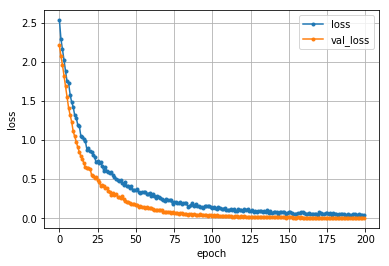

In [14]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(range(epochs), loss, marker = ".", label = "loss")
plt.plot(range(epochs),val_loss , marker = "." ,label = "val_loss")
plt.legend(loc = "best")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

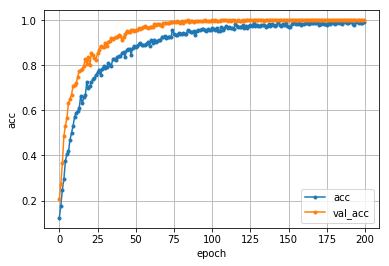

In [15]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]

plt.plot(range(epochs), acc, marker = ".", label = "acc")
plt.plot(range(epochs),val_acc , marker = "." ,label = "val_acc")
plt.legend(loc = "best")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("acc")
plt.show()

In [16]:
import pickle

In [17]:
with open("./results/history3.pkl" , mode = "wbf") as f :
    pickle.dump(history.history, f)

In [18]:
model.save("./results/model3.h5")

In [19]:
def predict(img_file_path):
    display(Image(img_file_path, width = 150 , unconfined = True ))
    img = image.load_img(img_file_path , target_size = (img_rows, img_cols))
    x = image.img_to_array(img)
    x = np.expand_dims(x , axis = 0)
    
    x = x / 255.0
    
    pred = model.predict(x)[0]
    
    top = 5
    top_indices = pred.argsort()[-top:][::-1]
    result = [(classes[i], pred[i]) for i in top_indices]
    for x in result:
        print(x)
        

In [20]:
predict("./validation/jellyfish/0ed923559435f325d2175905ec9f4258_m.jpg")

IOError: [Errno 2] No such file or directory: './validation/jellyfish/0ed923559435f325d2175905ec9f4258_m.jpg'

In [ ]:
import coremltools

model_path = "./results/model3.h5"
coreml_model = coremltools.converters.keras.convert(
    model_path,
    input_names = "image",
    image_input_names = "image",
    class_labels =  "./label.txt",
    is_bgr = True,
    image_scale = 1./255
)
coreml_model.save("./models/aquarium3.mlmodel")